In [31]:
get_ipython().run_line_magic('run', 'main.py')


import pickle 
import matplotlib.animation as animation

galactic_radius = 20  ##galactic radius is fixed in kpc
    
def mass_density_plot(radius, density_catalog, z, title = "Mass Density"): 
        
        "takes in radius and density catalog and plots the mass density" 
        
        for z in density_catalog: 
            masses = density_catalog[z]
            
            x = masses
            y = radius 
            
        plt.plot(x,y) 
        plt.title(title)

In [32]:
path = "/Users/marxena/Desktop/Dionysus/data/"

In [33]:
def open_pickle(filename):
    
    "opens the galaxy file using pickle. Filename- name of file to open"
    
    try:
        with open(filename, 'rb') as f:
            coords = pickle.load(f)
        return coords
    
    except FileNotFoundError:
        print("File not found.")  

In [63]:
def open_multiple_pickles(file_count):
    
    "opens multiple files using pickle. file_count is the number of files to open."
    
    for i in range(file_count):
        file = path + f"cat_id_0_dm_coords_snap_90"  # Change the file name pattern as needed
        try:
            with open(file, 'rb') as f:
                coords = pickle.load(f)
            # Do something with the loaded coordinates
            print(f"Loaded coordinates from {file}: {coords}")
            #return coords
            
        except FileNotFoundError:
            print(f"File not found: {file}")

In [64]:
twenty = open_multiple_pickles(file_count = 20)
np.shape(twenty)

Loaded coordinates from /Users/marxena/Desktop/Dionysus/data/cat_id_0_dm_coords_snap_90: [[ 7312.907  24576.264  21376.477 ]
 [ 7312.374  24575.855  21376.49  ]
 [ 7313.2754 24577.035  21375.87  ]
 ...
 [ 7008.4243 25526.709  22267.078 ]
 [ 8001.211  24800.748  22064.24  ]
 [ 7753.8203 24627.43   22222.236 ]]
Loaded coordinates from /Users/marxena/Desktop/Dionysus/data/cat_id_0_dm_coords_snap_90: [[ 7312.907  24576.264  21376.477 ]
 [ 7312.374  24575.855  21376.49  ]
 [ 7313.2754 24577.035  21375.87  ]
 ...
 [ 7008.4243 25526.709  22267.078 ]
 [ 8001.211  24800.748  22064.24  ]
 [ 7753.8203 24627.43   22222.236 ]]
Loaded coordinates from /Users/marxena/Desktop/Dionysus/data/cat_id_0_dm_coords_snap_90: [[ 7312.907  24576.264  21376.477 ]
 [ 7312.374  24575.855  21376.49  ]
 [ 7313.2754 24577.035  21375.87  ]
 ...
 [ 7008.4243 25526.709  22267.078 ]
 [ 8001.211  24800.748  22064.24  ]
 [ 7753.8203 24627.43   22222.236 ]]
Loaded coordinates from /Users/marxena/Desktop/Dionysus/data/cat_id

()

In [36]:
def column(matrix, i, N):
    
    "takes in matrix, gives the column of matrix and an N number for output. x is 0, y is 1, z is 2"
    
    row = [row[i] for row in matrix]
    coord = row[:N]
    
    return coord

In [37]:
snap_90 = open_pickle(path + "cat_id_0_dm_coords_snap_95")
snap_90

array([[ 7314.8496, 24576.574 , 21338.307 ],
       [ 7314.5615, 24576.49  , 21339.367 ],
       [ 7315.2227, 24575.828 , 21339.375 ],
       ...,
       [ 7353.692 , 23584.79  , 20861.576 ],
       [ 6761.9834, 23873.338 , 20046.848 ],
       [ 6634.3745, 23594.793 , 20855.61  ]], dtype=float32)

In [38]:
x = column(snap_90, 0, 1000)
y = column(snap_90, 1, 1000)
z = column(snap_90, 2, 1000)

In [39]:
np.shape(y)

(1000,)

In [40]:
from astropy.cosmology import WMAP9 as cosmo
import plotly
import plotly.graph_objs as go
import plotly.offline as pyo

In [41]:
def scatterplotgalaxy(x, y, z): 
    
    "using x, y, and z from the column function, take in the arrays and makes a 3D scatter plot of mass distribution"
   
    trace = go.Scatter3d(x=x, y=y, z=z,  mode='markers')
    
    # Configure the layout.
    layout = go.Layout(margin={'l': 0, 'r': 0, 'b': 0, 't': 0})
    data = [trace]
    
    fig = go.Figure(data=data)
    fig.update_layout(scene = dict(xaxis_title='Mpc', yaxis_title='Mpc', zaxis_title='Mpc'))
    
    # Render the plot.
    plotly.offline.iplot(fig)
    plt.savefig("image")

In [42]:
def scatterplot(x, y, z):
    trace = go.Scatter3d(x=x, y=y, z=z, mode='markers')
    layout = go.Layout(margin={'l': 0, 'r': 0, 'b': 0, 't': 0})
    data = [trace]

    fig = go.Figure(data=data)
    fig.update_layout(scene=dict(
        xaxis_title='Mpc',
        yaxis_title='Mpc',
        zaxis_title='Mpc'))
    
    # Render the plot.
    pyo.plot(fig, filename='scatterplotgalaxy.html', auto_open=False)


In [43]:
scatterplot(x, y, z)

In [71]:
def update(frame):
    x = frame[:0]
    y = frame[:1]
    z = frame[:2]

    scat.set_xdata(x)
    scat.set_ydata(y)
    scat.set_zdata(z)
    
    return scat

TypeError: 'NoneType' object is not callable

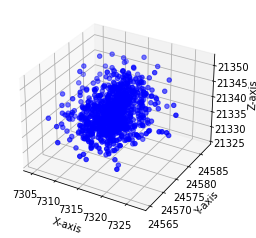

In [54]:
import ffmpeg

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scat = ax.scatter(x, y, z, c = 'b', marker='o')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ani = animation.FuncAnimation(fig, scatterplotgalaxy(x,y,z), twenty)
ani.save('526.gif')

plt.show()

In [72]:
ani = animation.FuncAnimation(fig, update, frames = 19)
plt.show()

ani.save("frame.gif")

TypeError: 'int' object is not iterable

In [ ]:
###make a function that iterates through al 20 of the maps and appends their x y and z to empty arrays
#then using that, itterate through to get the different imagees to reccord 

In [ ]:
def hopethisgifworks(array, N):
    
    for i in range(array): 
        file = open_pickle(filename)
        
        x = column(file, 0, N)
        y = column(file, 1, N)
        z = column(file, 2, N)
        
        scatter = scatterplotgalaxy(x, y, z)
    

In [ ]:
hopethisgifworks(twenty, N = 10)